##### Preamble: setting up the programming environment.

In [35]:
import xarray as xr
import matplotlib.pyplot as plt
import cftime

import doralite
import gfdl_utils.core as gu

project_list = doralite.list_project("cmip6")['project']
project_titles = [project["title"] for project in project_list]

cmip6_experiments = (
    project_list[project_titles.index('DECK Experiments')]['experiments'] +
    project_list[project_titles.index('ScenarioMIP Experiments')]['experiments']
)
cmip6_expNames = [expdict['expName'] for expdict in cmip6_experiments]
cmip6_dict = {
    expdict['expName']:expdict['master_id']
    for expdict in cmip6_experiments
    if expdict['expName'] in [
        "ESM4_ssp370_D1",
        "ESM4_historical_D1",
    ]
}

pp_ssp7 = doralite.dora_metadata(cmip6_dict["ESM4_ssp370_D1"])["pathPP"]
pp_hist = doralite.dora_metadata(cmip6_dict["ESM4_historical_D1"])["pathPP"]

def open_var(pp, var, times, **kwargs):
    #ppname = gu.find_unique_variable(pp, var, **kwargs)
    ppname = "atmos_cmip"
    if var=="*":
        var = gu.get_allvars(pp)[ppname]
        
    out = "ts"
    local = gu.get_local(pp, ppname, out, local1priority="daily")
    ds_list = [gu.open_frompp(pp, ppname, out, local, t, var, decode_timedelta=True) for t in times]
    return xr.concat(ds_list, dim="time")

vars_ssp7 = gu.get_allvars(pp_ssp7)["atmos_cmip"]
vars_hist = gu.get_allvars(pp_hist)["atmos_cmip"];
var_list = ["albs", "cldnvi", "clt", "hfls", "hfss", "hur", "hursmax", "hursmin", "hurs", "hur_unmsk", "hus850", "hus", "huss", "hus_unmsk", "prc", "pr", "prsn", "prw", "psl", "ps", "rlds", "rls", "rlus", "rlut", "rsdscsdiff", "rsdsdiff", "rsds", "rss", "rsus", "sfcWindmax", "sfcWind", "ta500", "ta850", "ta", "tasmax", "tasmin", "tas", "ta_unmsk", "tauu", "tauv", "tslsi", "ts", "ua", "uas", "ua_unmsk", "va", "vas", "va_unmsk", "wap", "wap_unmsk", "zg", "zg_plev19", "zmla"];

# Exploratory Analysis of a CMIP6 Climate Model

An experiment in humility w/ Henri Drake

### At your disposal:

Climate model data describing the state of the atmosphere every day for:
- Years 1850-1859
- Years 2005-2014
- Years 2090-2099

These data are taken from the two CMIP6 simulation experiments from the NOAA GFDL Earth System Model version 4 (ESM4).

In [2]:
cmip6_dict.keys()

dict_keys(['ESM4_historical_D1', 'ESM4_ssp370_D1'])

In [50]:
ds_ssp7 = open_var(pp_ssp7, ["tas", "clt", "huss"], ["*209*"], require=["cmip"]).sel(time=slice("2090", "2099"))
ds_hist = open_var(pp_hist, ["tas", "clt", "huss"], ["*2005*", "*2010*"], require=["cmip"])

In [66]:
m_ssp7 = open_var(pp_ssp7, ["tasmax", "tasmin"], ["*209*"], require=["cmip"]).sel(time=slice("2090", "2099"))
m_hist = open_var(pp_hist, ["tasmax", "tasmin"], ["*2005*", "*2010*"], require=["cmip"])

In [63]:
pr_ssp7 = open_var(pp_ssp7, ["pr"], ["*209*"], require=["cmip"]).sel(time=slice("2090", "2099"))
pr_hist = open_var(pp_hist, ["pr"], ["*2005*", "*2010*"], require=["cmip"])

In [60]:
ds_hist = open_var(pp_hist, ["tas", "clt", "huss"], ["*2005*", "*2010*"], require=["cmip"])

In [51]:
og = gu.open_static(pp_ssp7, "atmos_cmip")

### Our analysis

### Testing analysis of temperature in Celsius


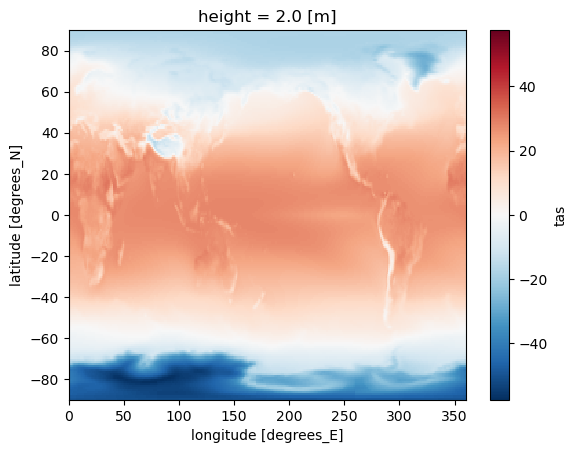

In [39]:
(ds_hist["tas"] - 273.15).mean("time").plot()

(20.0, 50.0)

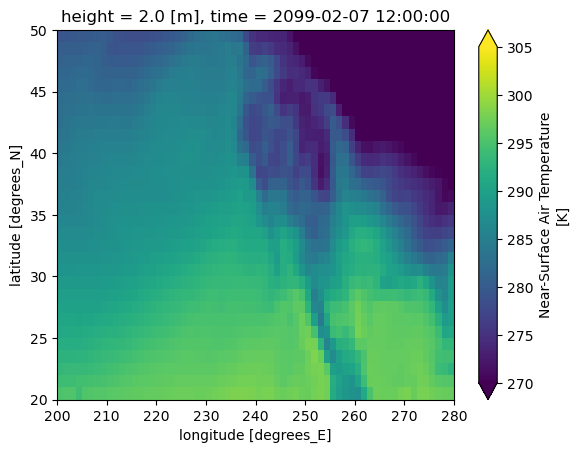

In [46]:
ds_ssp7.sel(time="2099-02-07")["tas"].plot(vmin=270, vmax=305)
plt.xlim(200, 280)
plt.ylim(20, 50)

### Conditions in the Midwest in a hotter 2090-2099

In [54]:
def K_to_F(T):
    return (T - 273.15)*1.8 + 32

In [65]:
var_list

['albs',
 'cldnvi',
 'clt',
 'hfls',
 'hfss',
 'hur',
 'hursmax',
 'hursmin',
 'hurs',
 'hur_unmsk',
 'hus850',
 'hus',
 'huss',
 'hus_unmsk',
 'prc',
 'pr',
 'prsn',
 'prw',
 'psl',
 'ps',
 'rlds',
 'rls',
 'rlus',
 'rlut',
 'rsdscsdiff',
 'rsdsdiff',
 'rsds',
 'rss',
 'rsus',
 'sfcWindmax',
 'sfcWind',
 'ta500',
 'ta850',
 'ta',
 'tasmax',
 'tasmin',
 'tas',
 'ta_unmsk',
 'tauu',
 'tauv',
 'tslsi',
 'ts',
 'ua',
 'uas',
 'ua_unmsk',
 'va',
 'vas',
 'va_unmsk',
 'wap',
 'wap_unmsk',
 'zg',
 'zg_plev19',
 'zmla']

(20.0, 65.0)

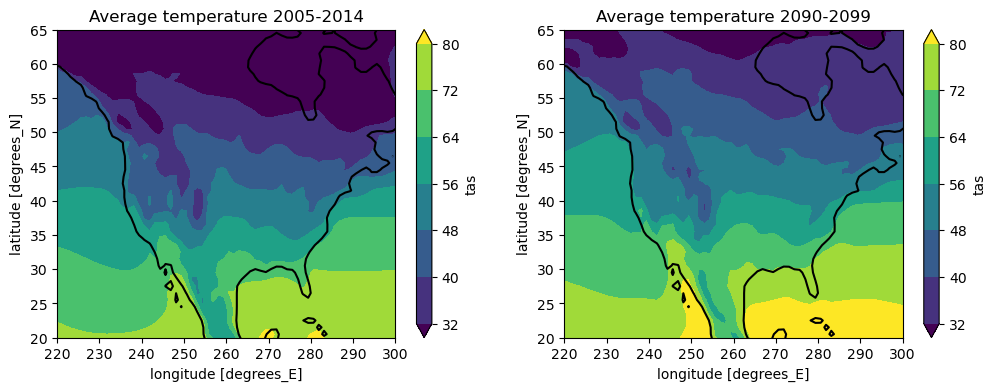

In [62]:
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
K_to_F(ds_hist["tas"]).mean("time").plot.contourf(vmin=32, vmax=80)
og.land_mask.plot.contour(levels=[0.5], colors="k")
plt.title("Average temperature 2005-2014")
plt.xlim(220, 300)
plt.ylim(20, 65)

plt.subplot(1,2,2)
K_to_F(ds_ssp7["tas"]).mean("time").plot.contourf(vmin=32, vmax=80)
og.land_mask.plot.contour(levels=[0.5], colors="k")
plt.title("Average temperature 2090-2099")
plt.xlim(220, 300)
plt.ylim(20, 65)

Text(0.5, 1.0, 'Clouds')

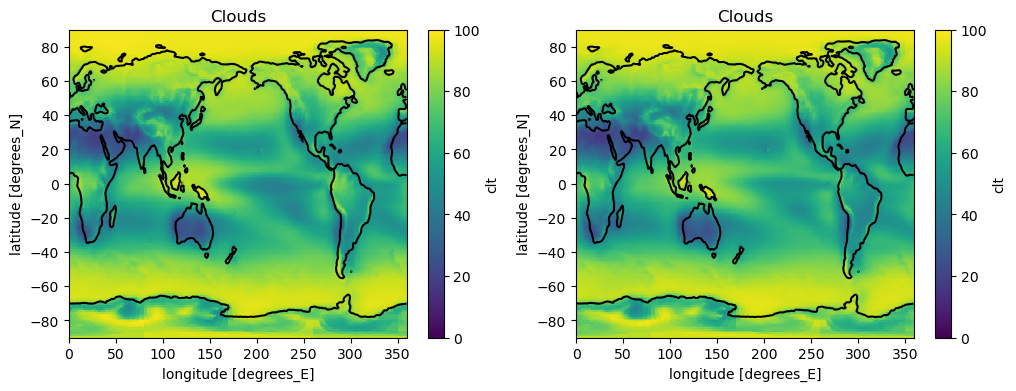

In [70]:
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
(ds_hist["clt"]).mean("time").plot(vmin=0, vmax=100)
og.land_mask.plot.contour(levels=[0.5], colors="k")
plt.title("Clouds")

plt.subplot(1,2,2)
(ds_ssp7["clt"]).mean("time").plot(vmin=0, vmax=100)
og.land_mask.plot.contour(levels=[0.5], colors="k")
plt.title("Clouds")

Text(0.5, 1.0, 'Clouds')

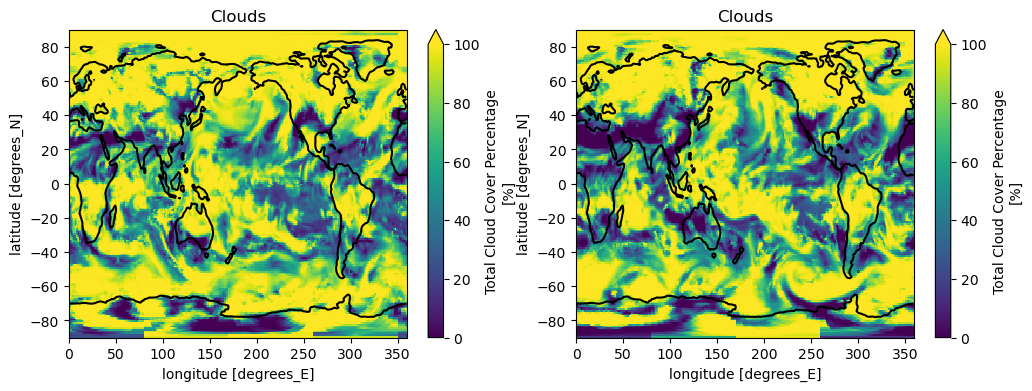

In [71]:
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
(ds_hist["clt"]).isel(time=0).plot(vmin=0, vmax=100)
og.land_mask.plot.contour(levels=[0.5], colors="k")
plt.title("Clouds")

plt.subplot(1,2,2)
(ds_ssp7["clt"]).isel(time=0).plot(vmin=0, vmax=100)
og.land_mask.plot.contour(levels=[0.5], colors="k")
plt.title("Clouds")